# MTMW14：Numerical Modelling of Atmosphere and Oceans

### Project 2: A simplified model of ocean gyres and the Gulf Stream

#### Student number: 25806676

### 1. Model description
The model of Stommel is the simplest dynamical model which can represent a wind driven circulation in a closed ocean basin including a western current. It describes the horizontal flow of an incompressible fluid with a free surface and solid lower boundary.

This model can be described by the shallow water equations, linearised about the resting state:
$$\frac{\partial\eta}{\partial t} + H\nabla \cdot \textbf V = 0,$$
$$\frac{\partial\textbf V}{\partial t} + (f_{0} + \beta y)\textbf k \times \textbf V = -g\nabla\eta - \gamma\textbf V + \frac{\tau}{\rho H},$$

In which $\eta$ is the surface elevation and $\textbf V$ is depth-averaged horizontal velocity. These two equations are solved subject to no-normal flow(kinematic) boundary conditions. The computational domain is a square with the ranges $[0,L]\: \times \:[0,L]$ where $L = 10^{6} \:m$. And the physical constants $f_{0},\: \beta, \:g,\: \gamma, \:\rho$ and $H$ are set to $10^{-4}\: s^{-1}, 10^{-11}\:m^{-1}s^{-1}, 10 \:ms^{-2}, 10^{-6}\:s^{-1}, 1000 \:kg m^{-3}$ and $1000 \:m$. Initially, the flow is at rest and velocity and elevation are zero.

More details of the parameters can be found in the code file $parameter.py$

### 2. Task A
Based on the description of this project, to compute the Rossby radius of deformation $R_{D}$, use:
$$ R_{D} = \frac{\sqrt{gH}}{f_{0}} $$ hence: $$ R_{D} = \frac{\sqrt{10\times 1000}}{10^{-4}} = 10^{6}m \qquad (1)$$
And the value of $d$ could be $25\:km$ which can represent the dynamic featrue of this gyre and it is large enough to save the running time. On the other hand, $\frac{R_{D}}{d}\:=\:\frac{10^{6}\:m}{25\:km}\:=\:40>10,$ which means the high resolution and good graphic representation.

For choosing the time-step to get a stable numerical solution, the relationship of $d$ and $dt$ should meet the CFL criterion:
$$\textbf C_x^2 \frac{\Delta t^2}{\Delta x^2} +  \textbf C_y^2 \frac{\Delta t^2}{\Delta y^2}  \leq 1\qquad (2)$$
$\textbf C_x$ and $\textbf C_y$ are phase speeds in different direction, because this model is described by the shallow water equation, the maximum phase speed is $\sqrt{gH}$.$\:$And $\Delta x$ and $\Delta y$ should be $d \:=\:25\:km$ in this question. Hence:
$$ gH \cdot \frac{\Delta t^2}{d^2} \leq \frac{1}{2} \qquad (3)$$ So that:$$dt_{max}\:=\: \sqrt{\frac{1}{2gH}\cdot d^2} \approx 177\:s$$

According to the dispersion relationship among different grids types, when the model is high-resolution, the Arakawa C-grid has the best results, combine the results above, this model can use Arakawe C-grid in space. 

<img style="float: center;" src="./C.jpg" width="40%">

Figure 1: The Arakawa C-grid figure with $\eta, u$ and $v$ which is a simplified model, the scale is $4\:\times \:4$.

 $\textbf { But the meaning if index of each variables differs from the lecture note's: The left index means the order of zonal lines, and the right }$ $\textbf {index means the order of meridional lines.}$ $\:$This is also applied in the coding, so the type of fomula in code might be slightly different from lecture note, especially the index part.
 
According to Figure 1, it is found that Arakawa C-grid is more staggered, the positions of  $\eta, \:u\:$ and $\:v\:$ are not the same.It further separates evaluation of vector quantities.Combined the CFL criteria of flow(Equation 3), get:
$$\sqrt{gH} \cdot \frac{\Delta t}{d} \leq \sqrt{\frac{1}{2}},$$ so $\sqrt{gH} \cdot\Delta t \leq \sqrt{\frac{1}{2}}d\:$, which means the shallow water wave must not travel further than the distance $\sqrt{\frac{1}{2}}d\:$. Meanwhile, on the Arakawa C-grid, the distance of $\:u\:$ and $\:v\:$ is $\sqrt{\frac{1}{2}}d\:$. Therefore, this kind of spatial grid is very suitable for this model.

### 3. Task B
Now use the finite difference model with Arakawa C-grid in space and forward-backward time scheme to calculate the ocean gyre.To make it convienient for calculating, combine the result of  The detailed equations are on the project note, but there are still some information should be described:

1. Because on the Arakawa C-grid the position of variables get staggered, interpolation should be applied in the model.$\;$For $\eta:\:$
$$\frac{\partial u}{\partial x}\Big|_{i,j} = \frac{u_{i,j+1}-u_{i,j}}{d}\hspace{2em} \frac{\partial v}{\partial y}\Big|_{i,j} = \frac{v_{i+1,j}-v_{i,j}}{d}$$ And for $u$:
$$\frac{\partial \eta}{\partial x}\Big|_{i,j} = \frac{\eta_{i,j}-\eta_{i,j-1}}{d}\hspace{2em} fv\Big|_{i,j} = f_i\frac{v_{i,j-1}+v_{i,j}+v_{i+1,j}+v_{i+1,j-1}}{4}$$ For $v$:
$$\frac{\partial \eta}{\partial y}\Big|_{i,j} = \frac{\eta_{i,j}-\eta_{i-1,j}}{d}\hspace{2em}fu\Big|_{i,j} = f_i\frac{u_{i,j+1}+u_{i,j}+u_{i-1,j}+u_{i-1,j+1}}{4} $$ $\textbf{(The index i represents zonal lines and j represents meridional lines)}$

2. Forward-backward time scheme means the result of one variable that just get in the previous equation should be used in the current fomula. So we calculate the $\eta^{n+1}$ first and use $\:\eta^{n+1}\: $ to calculate $u^{n+1}\:,$ then calculate $v^{n+1}$ by $\:u^{n+1}$ and $\eta^{n+1}\: $ in the third equation. However, on the next time step, $v$ should be calculated before $u$.

The codes about the calculation about is in file $fomula.py$, which are function **Arakawa** for numerical calculation and **enta_cal**,$\:$**u_cal**,$\:$**v_cal** for individual calculation of variables.

#### Results:

In [9]:
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import main as ma
from parameter import *
from fomula import *

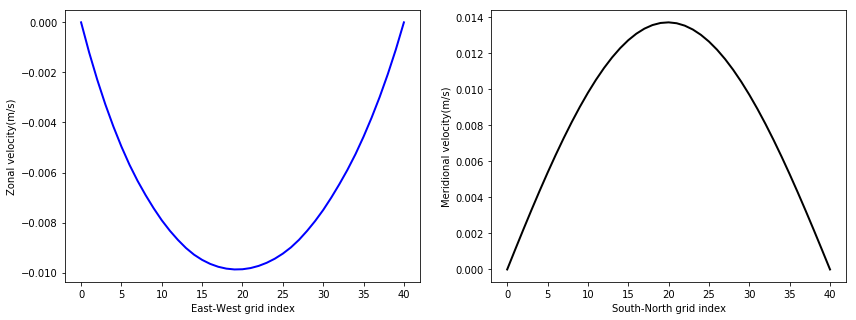

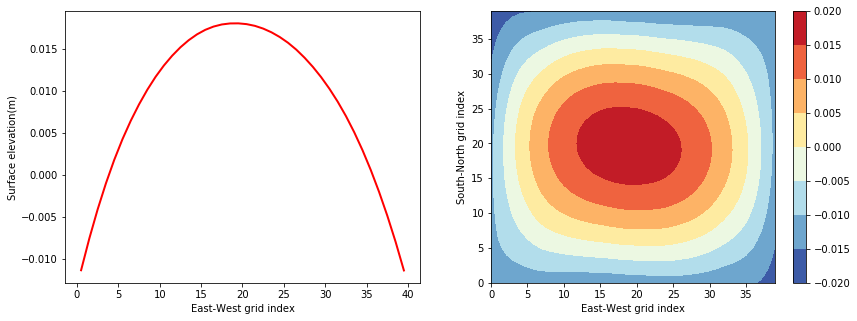

In [10]:
dict['d'] = 25000.
day = 1; question = 'B'
ma.main(day,question)

Figure 2: The results after running the model for one day. The blue curve is $u$ versus $x$ along the grid closest to the southern edge, the black curve is $v$ versus $y$ along the grid closest to the western edge, the red curve is $\eta$ versus $x$ through the middle of gyre and the colored field is coutourf plot showing the elevation.

According to Figure 2, on the south of this basin, zonal velocity is negative so that there is westward flow on the south; and meridional velocity on the west is positive so that there is northward flow on the west. Consider about the continuity of fluid, it can be indicated that this gyre is flowing clockwise. Furthermore, their absolute values have the same trend, which increase first and decrease then, they can get the peak on the middle. Meanwhile, the surface elevation through the middle gyre also rises first and decreases then. The results above indicates that on the center of this basin, the surface is relatively high so the elevation field in figure bottom-right confirms this. The gyre has a high-value center on the center and its structure is smooth and stable.

### 4. Task C
Use:
$$E(u,v,\eta) = \int_0^L\int_0^L \frac{1}{2}\rho(H(u^2\:+\:v^2)\:+\:g\eta^2)\:dxdy\qquad (4)$$ to calculate the total energy perturbation from the resting ocean numerically by python. The details of code are in **Arakawa** function and **TaskC** function of file $fomula.py$. Store the result for each time-step of the model.

#### Results:

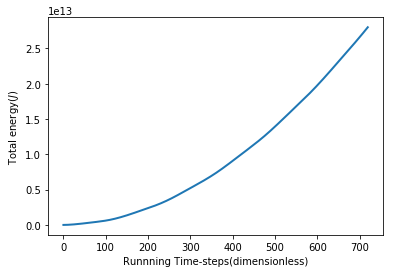

In [7]:
day = 1; question = 'C'
ma.main(day,question)

Figure 3.a: The time series of total energy of the perturbation from resting ocean after running one day.

According to Figure 3.a, it is obvious that the energy has an rising trend and the slope of the curve are getting larger and larger. This result does not meet the conclusion in Task A, which is that this model and scheme should be stable. So try to extend the model to 36 days:

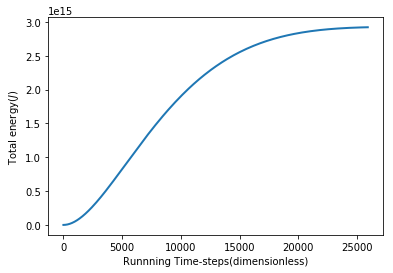

In [8]:
day = 36; question = 'C'
ma.main(day,question)

Figure 3.b: The time series of total energy of the perturbation from resting ocean after running 36 days.

According to Figure 3.b, the shape of this curve is just like a "S" because its rate of increasing shows a trend that increases first and tends to be 0 later. So this model is stable eventually if the running time is long enough. Furthermore, the total energy's approaching approximate steady state might takes about 22000 time-steps, but here the value of $dt$ is 2$min$, therefore it would take about 30 days.

### 5. Task D
Based on the equations provided by project note, calculate the exact results by python and compared the result with model result at the final time, so continue to set the number of days to 36, plot the surface elevation results directly:

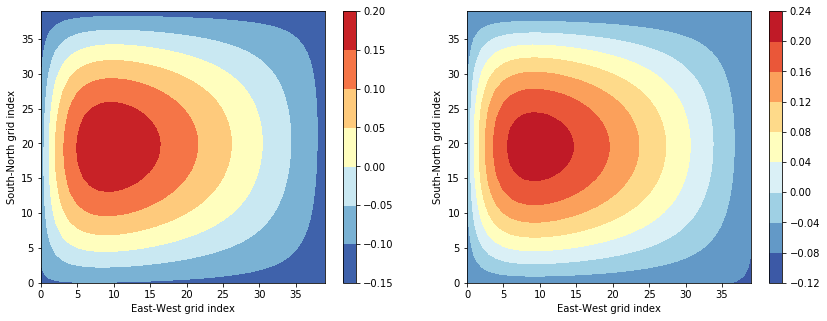

In [11]:
day = 36; question = 'D1'
ma.main(day,question)

Figure 4.a: The surfave elevation field of numerical calculation (left figure), of exact result(right figure)

It is found that both numerical model result and exact result, the ocean gyre propogates westward but still shows the North-South symmetrical type. However, the surface of exact result is higher than the numerical results, especially the high-value center on the west of this ocean basin: the crest of numerical calculated wave is below 0.20 $m$, but exact result's is higher than 0.20 $m$ and lower than 0.24 $m$. To find more details about their difference, plot $\eta - \eta_{exact}$ and the difference of energy.

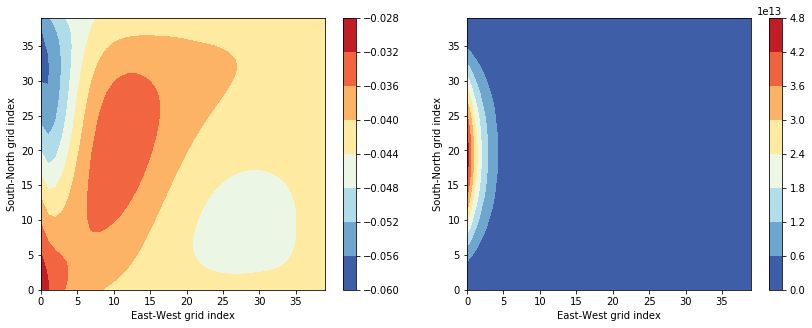

In [12]:
day = 36; question = 'D2'
ma.main(day,question)

Figure 4.b: The surfave elevation field difference between numerical calculation and exact result(left figure), and the total energy difference.

On these two figures, the position of difference between numerical results and ecact solution is very obvious, the main different areas are on the west of this basin and there is a highest value of difference on the western edge. But only energy difference filed shows the meridional symmetrical type and very high energy difference settles on the midpoint of western edge.

The requirment of this task is halving the grid-spacing to compare the change of difference between numerical calculation and exact solution with resolution. But the grid-spacing I use now is 25 $km$ which is very high, to reduce the running time, setting the grid-spacing to 50 $km$ is also can study the sensitivity to resolution. Consider the CFL criteria, the $\Delta t_{max}$ of 25 $km$ is smaller than 50 $km$'s. So the value of $dt$ could stays. And we use the value of total energy difference to test the resolution 


In [7]:
enta,entast,E,ee = TaskD(36,'D2')
print ('When resolution is 25 km, the difference of total energy is:', E)


('When resolution is 25 km, the difference of total energy is:', 2372935027696547.0)


In [4]:
dict['d'] = 50000.
enta,entast,E,ee = TaskD(36,'D2')
print ('When resolution is 50 km, the difference of total energy is:', E)

('When resolution is 50 km, the difference of total energy is:', 38220649321838432.0)


According to the result above, the coarse resolution of spatial grid may lead a relatively higher energy error from the exact result, in other words, the model tends towards the exact solution as resolution is increased. Because the energy error when d = 50km is higher than d = 25km.

### 6. Task E
Try semi-Lagrangian method to calculate the ocean gyre: Calculate short trajectories backward-in-time from a fixed grid and use them to evaluate the Lagrangian rates of change at every grid-point. Trajectory calculation can be cheap, because quite short. So use a two-stage mid-point method:
$$x_* = x_{i,j}^{n+1} - u(x_{i,j}^{n+1},t^n)\Delta t/2$$
$$\tilde{x_{i,j}}^{n} = x_{i,j}^{n+1} - u(x_{*},t^{n+\frac{1}{2}})\Delta t$$
But we can use the linear approximation for $u(x_{*},t^{n+\frac{1}{2}})\:,$ which is $\frac{3}{2}u(t^n) - \frac{1}{2}u(t^{n-1})$. Use this method find the position of depature point, and do numerical calculation by:
$$ \frac{\eta_{i,j}^{n+1}-\tilde{\eta_{i,j}^{n}}}{\Delta t} \approx \frac{1}{2}({S_{i,j}^{n+1}+\tilde{S_{i,j}^{n}}}) $$
But if the depature point does not settle on the grid, interpolation must be applied now. The details of the interpolation are in the file $Taske.py$.

In this task, forward-backward time scheme can also be used. Calculate $\eta^{n+1}$ first, which is explicit:
$$\eta ^{n+1} = \tilde{\eta ^{n}}- \frac{H\Delta t}{2}(\frac{\partial (u^{n} + \tilde{u^{n}})}{\partial x} + \frac{\partial (v^{n} + \tilde{v^{n}})}{\partial y})$$
when calculating the $u^{n+1}$, just use the $\eta^{n+1}$ and its depature point value. Meanwhile, use $\frac{\gamma \Delta t }{2}(u^{n+1}+\tilde{u^{n}})$ to replace the $\gamma \Delta t u^{n}$ term in the previous equation, and then could move the $u^{n+1}$ term to the left of equal sign to solve:
$$  (1+ \frac{\gamma \Delta t }{2})u^{n+1} = \tilde{u^{n}} + \frac{(f_{0}+\beta y)\Delta t}{2}(v^{n}+\tilde{v^{n}}) - \frac{g\Delta t}{2}\frac{\partial (\eta ^{n+1}+\tilde{\eta ^{n}})}{\partial x} - \frac{\gamma \Delta t }{2}\tilde{u^{n}} + \frac{\tau _{x}+\tilde{\tau _{x}}}{2\rho H}\Delta t $$
Use the similar way to calculate the $v^{n+1}$
$$  (1+ \frac{\gamma \Delta t }{2})v^{n+1} = \tilde{v^{n}} - \frac{(f_{0}+\beta y)\Delta t}{2}(u^{n+1}+\tilde{u^{n}}) - \frac{g\Delta t}{2}\frac{\partial (\eta ^{n+1}+\tilde{\eta ^{n}})}{\partial x} - \frac{\gamma \Delta t }{2}\tilde{v^{n}} + \frac{\tau _{y}+\tilde{\tau _{y}}}{2\rho H}\Delta t $$

On the next time step, also calculate $v$ before $u$ just the same as Task B.

#### (Sorry I only finish the interpolation function of Task E and failed to plot the semi-Lagrangian model)